Human Activity Recognition (HAR)
=

**Preprocessing**

In [202]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train"
test_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Done Combining the training data
Done Combining the testing data
Done Combining the data


In [203]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


**TASK-1**
=

**1**


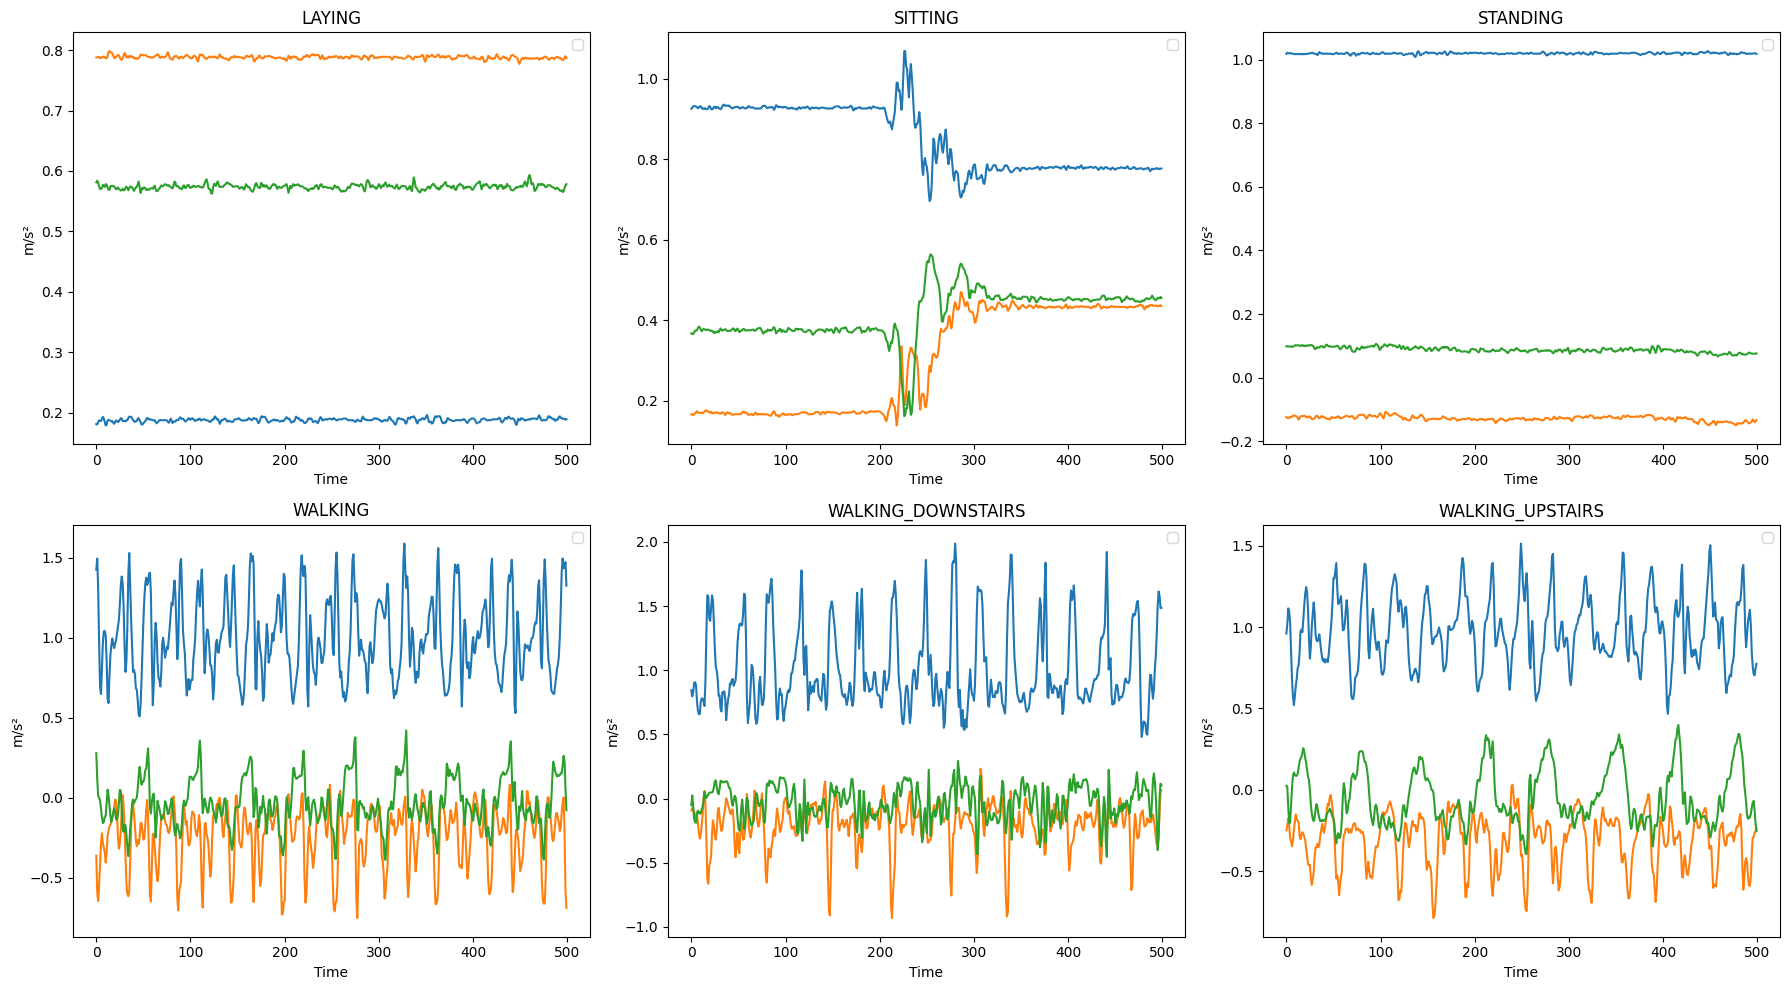

In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading one sample data from each activity class
LAYING = pd.read_csv("/kaggle/working/Combined/Train/LAYING/Subject_1.csv")
SITTING = pd.read_csv("/kaggle/working/Combined/Train/SITTING/Subject_1.csv")
STANDING = pd.read_csv("/kaggle/working/Combined/Train/STANDING/Subject_1.csv")
WALKING = pd.read_csv("/kaggle/working/Combined/Train/WALKING/Subject_1.csv")
WALKING_DOWNSTAIRS = pd.read_csv("/kaggle/working/Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv")
WALKING_UPSTAIRS = pd.read_csv("/kaggle/working/Combined/Train/WALKING_UPSTAIRS/Subject_1.csv")

activities = [LAYING, SITTING, STANDING, WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS]
activity_names = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

#Plot function
def waveform(Activity, s):
    acc_x = Activity['accx'][:500] # taking the data of first 10 seconds
    acc_y = Activity['accy'][:500]
    acc_z = Activity['accz'][:500]

    plt.plot(acc_x)
    plt.plot(acc_y)
    plt.plot(acc_z)
    plt.title(s)
    plt.xlabel("Time")
    plt.ylabel("m/s²")
    plt.legend()

plt.figure(figsize=(18, 10))

for i, activity in enumerate(activities):
    plt.subplot(2, 3, i+1)  
    waveform(activity, activity_names[i])

plt.tight_layout()
plt.show()


**2**


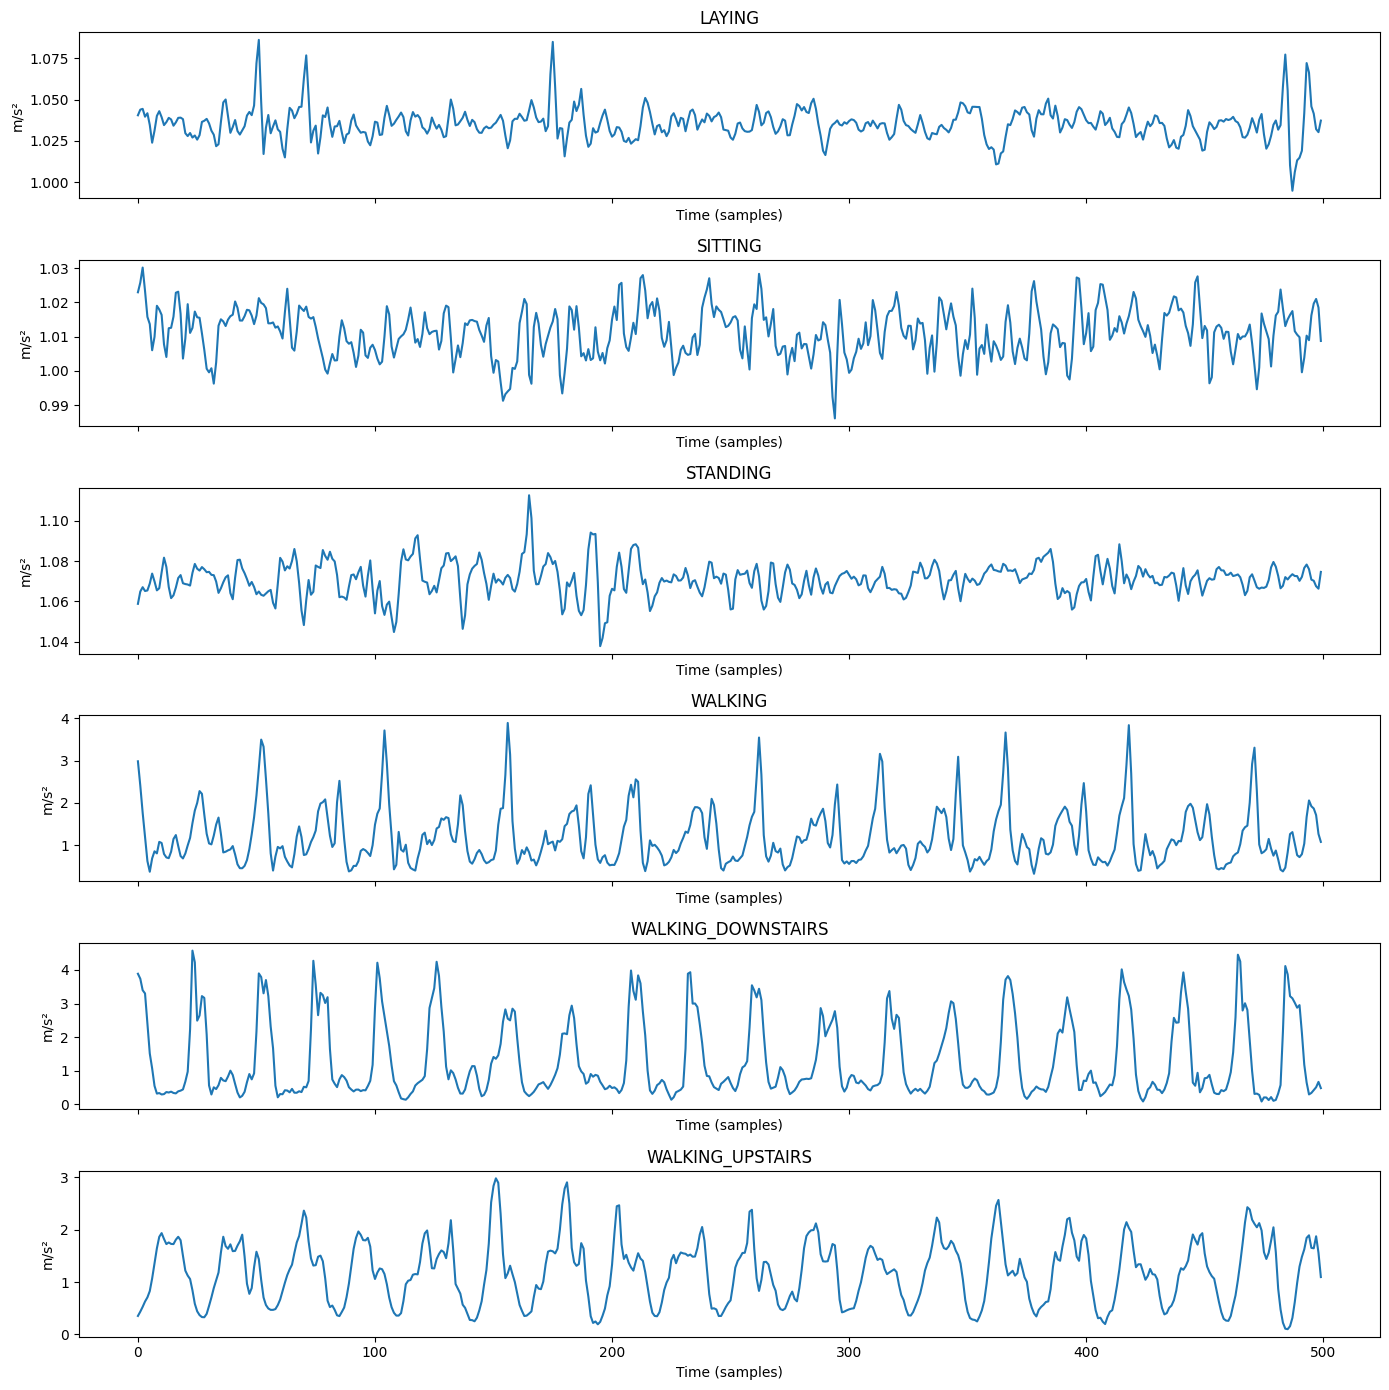

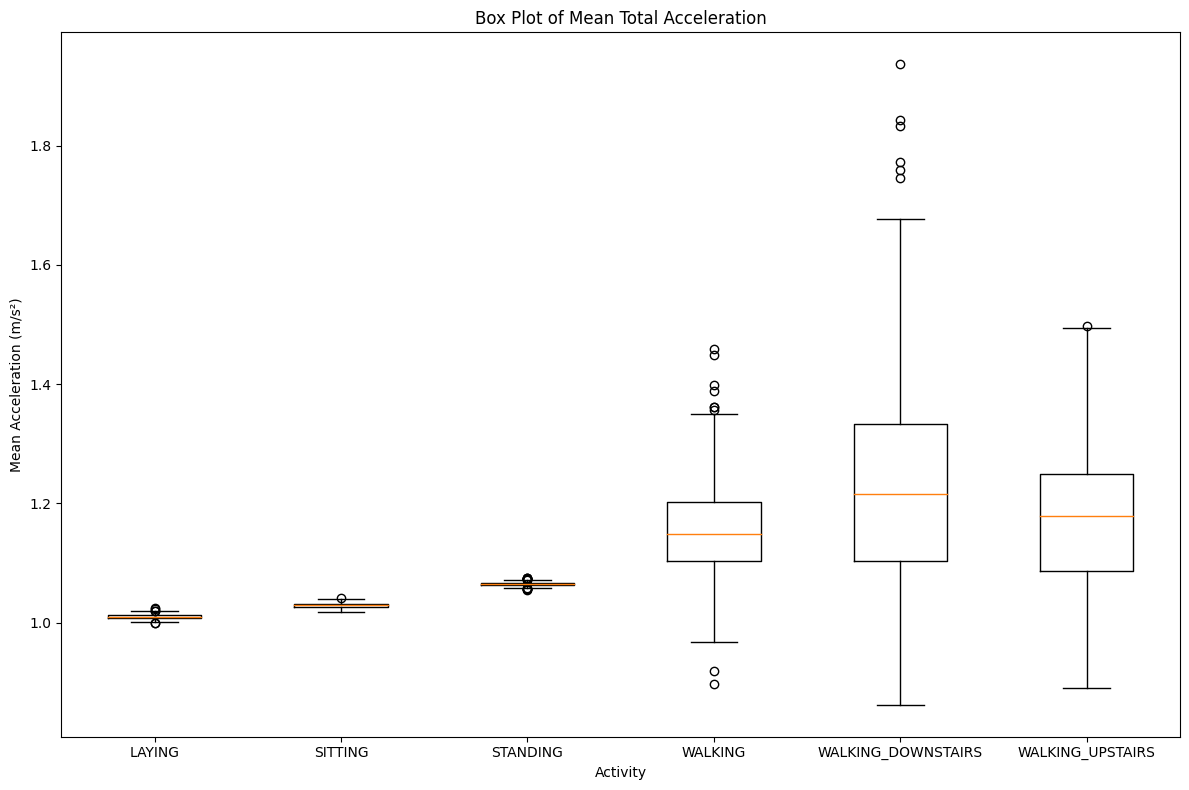

In [205]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def total_acc(df, activity_name):
    if {'accx', 'accy', 'accz'}.issubset(df.columns):
        x, y, z = df['accx'], df['accy'], df['accz']
    elif {'x', 'y', 'z'}.issubset(df.columns):
        x, y, z = df['x'], df['y'], df['z']
    else:
        return None
    return (x**2 + y**2 + z**2)[:500]

file_paths = {
    'LAYING': r"/kaggle/working/Combined/Train/LAYING",
    'SITTING': r"/kaggle/working/Combined/Train/SITTING",
    'STANDING': r"/kaggle/working/Combined/Train/STANDING",
    'WALKING': r"/kaggle/working/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': r"/kaggle/working/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': r"/kaggle/working/Combined/Train/WALKING_UPSTAIRS"
}

fig, axes = plt.subplots(len(file_paths), 1, figsize=(14, 14), sharex=True)
for ax, (activity, folder) in zip(axes, file_paths.items()):
    files = [f for f in os.listdir(folder) if f.endswith('.csv')]
    if not files:
        continue
    df = pd.read_csv(os.path.join(folder, files[0]))
    acc_t = total_acc(df, activity)
    if acc_t is not None:
        ax.plot(acc_t)
        ax.set_title(activity)
        ax.set_ylabel("m/s²")
        ax.set_xlabel("Time (samples)")
plt.tight_layout()
plt.show()

activity_means = []
activity_labels = []

for activity, folder in file_paths.items():
    all_data = []
    files = [f for f in os.listdir(folder) if f.endswith('.csv')]
    if not files:
        continue
    for file in files:
        df = pd.read_csv(os.path.join(folder, file))
        if {'accx', 'accy', 'accz'}.issubset(df.columns):
            df['a'] = df['accx']**2 + df['accy']**2 + df['accz']**2
        elif {'x', 'y', 'z'}.issubset(df.columns):
            df['a'] = df['x']**2 + df['y']**2 + df['z']**2
        else:
            continue
        df = df.head(500)
        all_data.append(df['a'])
    if all_data:
        combined_data = pd.concat(all_data, axis=1)
        mean_acc = combined_data.mean(axis=1)
        activity_means.extend(mean_acc)
        activity_labels.extend([activity] * len(mean_acc))

plot_data = pd.DataFrame({
    'Activity': activity_labels,
    'Mean': activity_means,
})


fig, ax = plt.subplots(figsize=(12, 8))
ax.boxplot(
    [plot_data[plot_data['Activity'] == activity]['Mean'] for activity in file_paths.keys()],
    labels=file_paths.keys()
)
ax.set_title("Box Plot of Mean Total Acceleration")
ax.set_xlabel("Activity")
ax.set_ylabel("Mean Acceleration (m/s²)")
plt.tight_layout()
plt.show()


In [206]:
activity_summary = plot_data.groupby("Activity")["Mean"].agg(["mean", "var"])

print(activity_summary)

                        mean       var
Activity                              
LAYING              1.010314  0.000011
SITTING             1.029347  0.000016
STANDING            1.065081  0.000009
WALKING             1.154551  0.006167
WALKING_DOWNSTAIRS  1.227920  0.030984
WALKING_UPSTAIRS    1.166155  0.013819


For static activities like laying, sitting, and standing, the plots  look flat with only small changes. These signals have low variance and no clear repeating patterns.

For dynamic activities like walking, going downstairs, or going upstairs, the plots show repeating patterns with bigger changes. The accelerometer values vary a lot because of the continuous movement.

Since mean of all static activities are almost same and they have low-variance we can use simple methods can often tell static and dynamic activities apart, but to separate different dynamic activities, we usually need machine learning because their patterns are more complex and harder to tell apart.

**3**


(126, 500)
(126,)


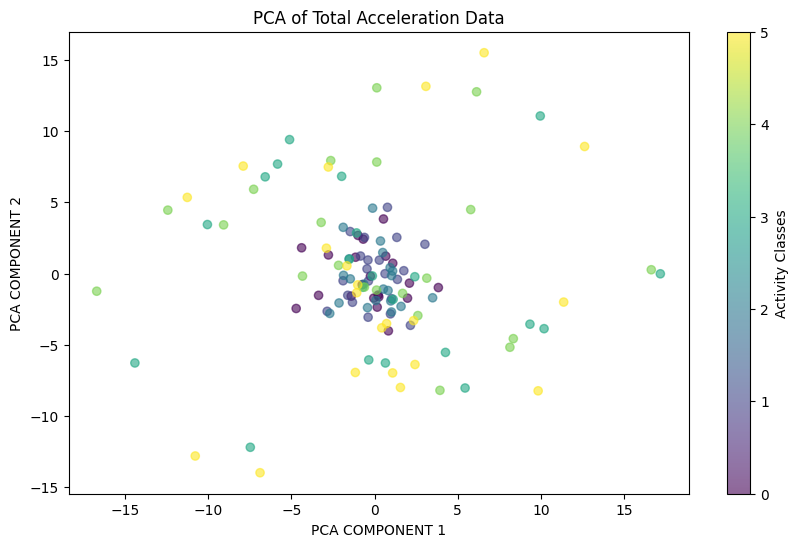

In [207]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

activity_paths = {
    'LAYING': "/kaggle/working/Combined/Train/LAYING",
    'SITTING': "/kaggle/working/Combined/Train/SITTING",
    'STANDING': "/kaggle/working/Combined/Train/STANDING",
    'WALKING': "/kaggle/working/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/kaggle/working/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/kaggle/working/Combined/Train/WALKING_UPSTAIRS"
}

samples = []
labels = []

for activity, activity_path in activity_paths.items():

    file_names = os.listdir(activity_path)

    for file_name in file_names:
        file_path = os.path.join(activity_path, file_name)

        data = pd.read_csv(file_path)

        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]

        acc_t = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        acc_t=(acc_t-acc_t.mean())/acc_t.std()

        samples.append(acc_t)
        labels.append(activity)

samples = np.array(samples)
labels = np.array(labels)
print(samples.shape)
print(labels.shape)

# Flatten each time-series sample into a 1D feature vector so it can be used for model training
flat_data = samples.reshape(len(samples), -1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(flat_data)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Classes')
plt.title('PCA of Total Acceleration Data')
plt.xlabel('PCA COMPONENT 1')
plt.ylabel('PCA COMPONENT 2')
plt.show()

In [208]:
pip install tsfel


Note: you may need to restart the kernel to use updated packages.


In [209]:
import warnings
warnings.filterwarnings("ignore")

**PCA on tsfel features**

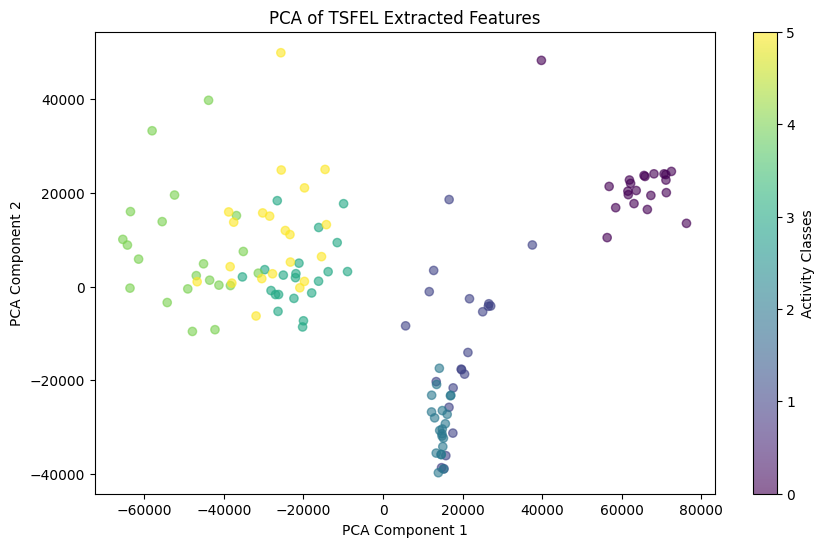

In [210]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tsfel

features_list = []
labels = []

for activity, activity_dir in activity_paths.items():

    file_names = os.listdir(activity_dir)

    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        df = pd.DataFrame({
            'acc_x': acc_x,
            'acc_y': acc_y,
            'acc_z': acc_z
        })
    
        cfg = tsfel.get_features_by_domain()
        #tsfel features extraction from df(with accx,accy,accz)
        features = tsfel.time_series_features_extractor(cfg, df)


        features_list.append(features.values.flatten())
        labels.append(activity)


features_array = np.array(features_list)
labels = np.array(labels)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_array)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=[['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'].index(activity) for activity in labels], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Classes')
plt.title('PCA of TSFEL Extracted Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**PCA on features provided**

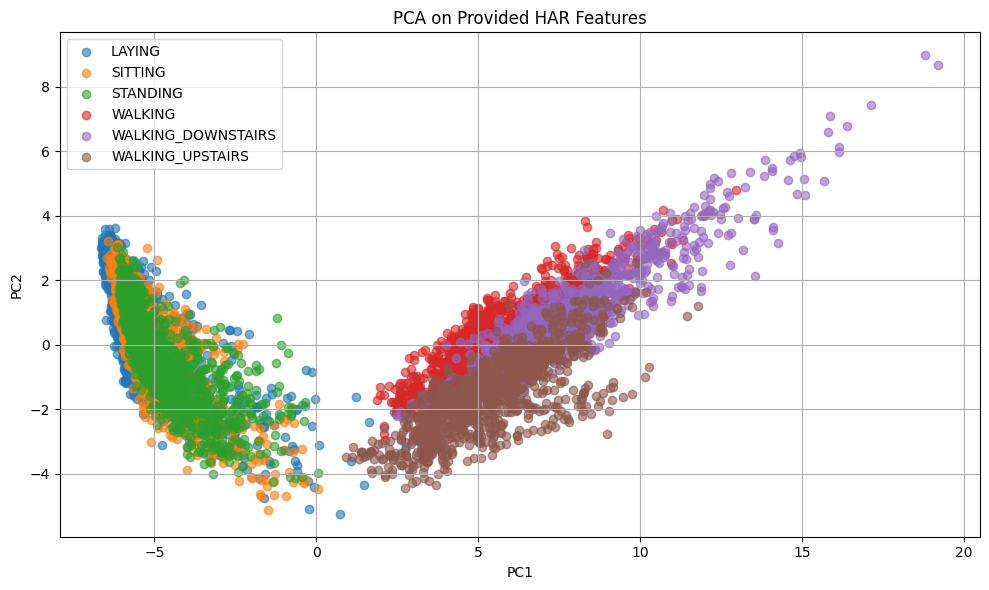

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Paths to feature and label files
X_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
y_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
label_names_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt"

# Load data
X = pd.read_csv(X_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_path, header=None).values.flatten()

# Mapping numeric labels to activity names
label_map = pd.read_csv(label_names_path, delim_whitespace=True, header=None, index_col=0)
y_named = [label_map.loc[label].values[0] for label in y]

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
for activity in np.unique(y_named):
    idx = np.array(y_named) == activity
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=activity, alpha=0.6)

plt.title("PCA on Provided HAR Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The dataset provided features are more informative as they show clearer patterns and clusters. They capture specific aspects of the activities that are more relevant for distinguishing between different activity classes.

In [212]:
import numpy as np
import pandas as pd

features_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/features.txt"
X_train_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
y_train_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"

with open(features_path, 'r') as f:
    uci_feature_names = [line.strip().split()[1] for line in f.readlines()]

X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None)
X_train.columns = uci_feature_names
y_train = pd.read_csv(y_train_path, delim_whitespace=True, header=None, names=['Activity'])

features_tsfel = features_array   
tsfel_feature_names = features.columns.tolist()

n = len(tsfel_feature_names)
X_train_subset = X_train.iloc[:features_tsfel.shape[0], :]

combined_features = np.hstack((features_tsfel, X_train_subset.values))
combined_feature_names = tsfel_feature_names + [f"UCI_{name}" for name in uci_feature_names[:X_train_subset.shape[1]]]
combined_df = pd.DataFrame(combined_features, columns=combined_feature_names)

def standardize(df):
    return (df - df.mean()) / df.std()

standardized_df = standardize(combined_df)

C = standardized_df.values
cov_matrix = C.T.dot(C) / (C.shape[0] - 1)
cov_matrix_df = pd.DataFrame(cov_matrix, index=combined_feature_names, columns=combined_feature_names)

threshold = 0.87
high_corr_pairs = [
    (i, j, cov_matrix_df.iat[i, j])
    for i in range(n)   # TSFEL
    for j in range(n, cov_matrix_df.shape[1])  # UCI
    if abs(cov_matrix_df.iat[i, j]) > threshold
]

print("Highly correlated pairs of features:")
for pair in high_corr_pairs:
    print(f"Feature {combined_feature_names[pair[0]]} and Feature {combined_feature_names[pair[1]]} with correlation {pair[2]:.2f}")


Highly correlated pairs of features:
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerk-entropy()-X with correlation 0.88
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerk-entropy()-Y with correlation 0.87
Feature acc_x_Peak to peak distance and Feature UCI_tBodyAccJerk-entropy()-Z with correlation 0.87
Feature acc_x_Peak to peak distance and Feature UCI_tBodyGyroJerk-entropy()-Y with correlation 0.88
Feature acc_x_Wavelet energy_2.78Hz and Feature UCI_tBodyAccJerk-entropy()-X with correlation 0.88
Feature acc_x_Wavelet energy_2.78Hz and Feature UCI_tBodyGyroJerk-entropy()-Y with correlation 0.87
Feature acc_x_Wavelet standard deviation_2.78Hz and Feature UCI_tBodyAccJerk-entropy()-X with correlation 0.88
Feature acc_x_Wavelet standard deviation_2.78Hz and Feature UCI_tBodyGyroJerk-entropy()-Y with correlation 0.87


Yes, there are redundant features 

After calculating the correlation matrix of the combined features (TSFEL + provided UCI features), several pairs were found to have high correlation (|ρ| ≈ 0.87–0.88). For example, acc_x_Peak to peak distance from TSFEL is strongly correlated with UCI_tBodyAccJerk-entropy()-X, Y, and Z, and also with UCI_tBodyGyroJerk-entropy()-Y. Similarly, acc_x_Wavelet features (energy and standard deviation at 2.78 Hz) are highly correlated with the same UCI features.

This indicates that there are redundant features in the combined feature set, since multiple features carry very similar information

**Task-2**
=

**1**


In [213]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

activity_dirs = {
    'LAYING': "/kaggle/working/Combined/Train/LAYING",
    'SITTING': "/kaggle/working/Combined/Train/SITTING",
    'STANDING': "/kaggle/working/Combined/Train/STANDING",
    'WALKING': "/kaggle/working/Combined/Train/WALKING",
    'WALKING_DOWNSTAIRS': "/kaggle/working/Combined/Train/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/kaggle/working/Combined/Train/WALKING_UPSTAIRS"
}

**Model using the raw accelerometer data**

In [214]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix

samples = []
labels = []


for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        total_acceleration = np.concatenate((acc_x, acc_y, acc_z))
        samples.append(total_acceleration)
        labels.append(activity)

samples = np.array(samples)
labels = np.array(labels)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)


X_train, X_test, y_train, y_test = train_test_split(samples, encoded_labels, test_size=0.3, random_state=42)

raw_clf = DecisionTreeClassifier(random_state=42)
raw_clf.fit(X_train, y_train)

y_pred = raw_clf.predict(X_test)

accuracy_raw = accuracy_score(y_test, y_pred)
precision_raw = precision_score(y_test, y_pred, average='weighted')
recall_raw= recall_score(y_test, y_pred, average='weighted')
conf_matrix_raw = confusion_matrix(y_test, y_pred)

print("Using raw accelerometer data\n")
print("Accuracy =", accuracy_raw)
print("Precision =", precision_raw)
print("Recall =", recall_raw)
print("Confusion Matrix:\n", conf_matrix_raw)

Using raw accelerometer data

Accuracy = 0.47368421052631576
Precision = 0.4529448621553886
Recall = 0.47368421052631576
Confusion Matrix:
 [[7 0 0 0 0 1]
 [0 5 2 0 0 0]
 [0 2 4 0 0 0]
 [0 2 0 1 0 3]
 [0 2 1 1 1 0]
 [0 1 0 3 2 0]]


**Model using the features  by TSFEL**

In [215]:
import os
import numpy as np
import pandas as pd
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

features_list = []
labels = []  
for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0)

        features_list.append(features.values.flatten())
        labels.append(activity)

features_array = np.array(features_list)
labels_array = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    features_array, labels_array, test_size=0.2, random_state=42
)

tsfel_clf = DecisionTreeClassifier(random_state=0) 
tsfel_clf.fit(X_train, y_train)

y_pred = tsfel_clf.predict(X_test)

accuracy_tsfel = accuracy_score(y_test, y_pred)
precision_tsfel = precision_score(y_test, y_pred, average='weighted')
recall_tsfel= recall_score(y_test, y_pred, average='weighted')
conf_matrix_tsfel = confusion_matrix(y_test, y_pred)

print("Using the features by TSFEL\n")
print("Accuracy =", accuracy_tsfel)
print("Precision =", precision_tsfel)
print("Recall =", recall_tsfel)
print("Confusion Matrix:\n", conf_matrix_tsfel)

Using the features by TSFEL

Accuracy = 0.7692307692307693
Precision = 0.8167582417582417
Recall = 0.7692307692307693
Confusion Matrix:
 [[5 1 0 0 0 0]
 [0 4 0 0 0 0]
 [0 2 3 0 0 0]
 [0 0 0 3 1 1]
 [0 0 0 0 4 0]
 [0 0 0 1 0 1]]


**Model using the features provided**

In [216]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

features_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
labels_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"  
features_names_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/features.txt"

feature_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()

# extracting unqiue features from the provided features
def make_unique(names):
    from collections import defaultdict
    counts = defaultdict(int)
    unique_names = []
    for name in names:
        if counts[name] > 0:
            new_name = f"{name}_{counts[name]}"
            unique_names.append(new_name)
        else:
            unique_names.append(name)
        counts[name] += 1
    return unique_names

feature_names = make_unique(feature_names)

X = pd.read_csv(features_path, delim_whitespace=True, header=None, names=feature_names)
y = pd.read_csv(labels_path, delim_whitespace=True, header=None, names=['Activity'])

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

prov_clf = DecisionTreeClassifier(random_state=0)
prov_clf.fit(X_train, y_train)


y_pred = prov_clf.predict(X_test)

accuracy_prov = accuracy_score(y_test, y_pred)
precision_prov = precision_score(y_test, y_pred, average='weighted')
recall_prov = recall_score(y_test, y_pred, average='weighted')
conf_matrix_prov = confusion_matrix(y_test, y_pred)

print("Using the features provided\n")
print("Accuracy =", accuracy_prov)
print("Precision =", precision_prov)
print("Recall =", recall_prov)
print("Confusion Matrix:\n", conf_matrix_prov)


Features shape: (7352, 561)
Labels shape: (7352, 1)
Using the features provided

Accuracy = 0.9428959891230455
Precision = 0.9428722695698822
Recall = 0.9428959891230455
Confusion Matrix:
 [[236   6   3   0   0   0]
 [  7 198  10   0   0   0]
 [  5   7 185   0   0   0]
 [  0   0   0 233  24   0]
 [  0   0   0  22 253   0]
 [  0   0   0   0   0 282]]


According to the results, the decision tree model using the dataset **provided features** performs better, as it achieves higher precision, accuracy, and recall. This  likely comes from well-designed features that capture the important details of the data effectively.

**2**

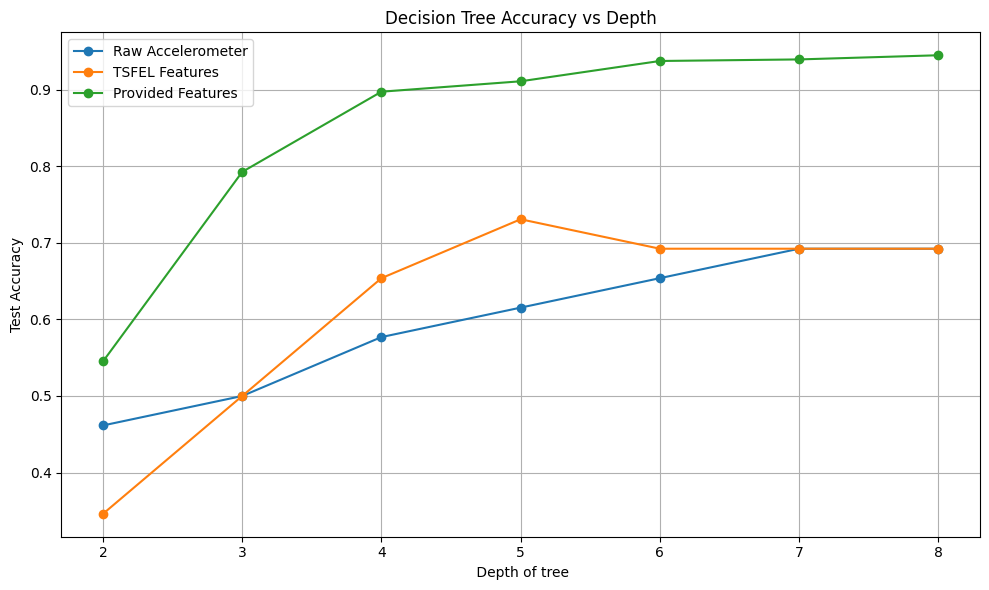

In [217]:
import os
import numpy as np
import pandas as pd
import tsfel
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

samples = []
labels = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        acc_t = np.concatenate((acc_x, acc_y, acc_z))
        samples.append(acc_t)
        labels.append(activity)

X_raw = np.array(samples)
y_raw = LabelEncoder().fit_transform(labels)

features_list = []
labels = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        cfg = tsfel.get_features_by_domain()
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0)

        features_list.append(features.values.flatten())
        labels.append(activity)

X_tsfel = np.array(features_list)
y_tsfel = LabelEncoder().fit_transform(labels)


features_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt"
labels_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt"
features_names_path = "/kaggle/input/har-data/UCI HAR Dataset/UCI HAR Dataset/features.txt"

feature_names = pd.read_csv(features_names_path, delim_whitespace=True, header=None)[1].tolist()

def make_unique(names):
    counts = defaultdict(int)
    unique_names = []
    for name in names:
        if counts[name] > 0:
            new_name = f"{name}_{counts[name]}"
            unique_names.append(new_name)
        else:
            unique_names.append(name)
        counts[name] += 1
    return unique_names

feature_names = make_unique(feature_names)

X_provided = pd.read_csv(features_path, delim_whitespace=True, header=None, names=feature_names).values
y_provided = pd.read_csv(labels_path, delim_whitespace=True, header=None).values.ravel()


def evaluate_model_depths(X, y, depths):
    accuracies = []
    for depth in depths:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    return accuracies


depths = list(range(2, 9))

acc_raw = evaluate_model_depths(X_raw, y_raw, depths)
acc_tsfel = evaluate_model_depths(X_tsfel, y_tsfel, depths)
acc_provided = evaluate_model_depths(X_provided, y_provided, depths)


plt.figure(figsize=(10, 6))
plt.plot(depths, acc_raw, marker='o', label='Raw Accelerometer')
plt.plot(depths, acc_tsfel, marker='o', label='TSFEL Features')
plt.plot(depths, acc_provided, marker='o', label='Provided Features')
plt.xlabel(" Depth of tree")
plt.ylabel("Test Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


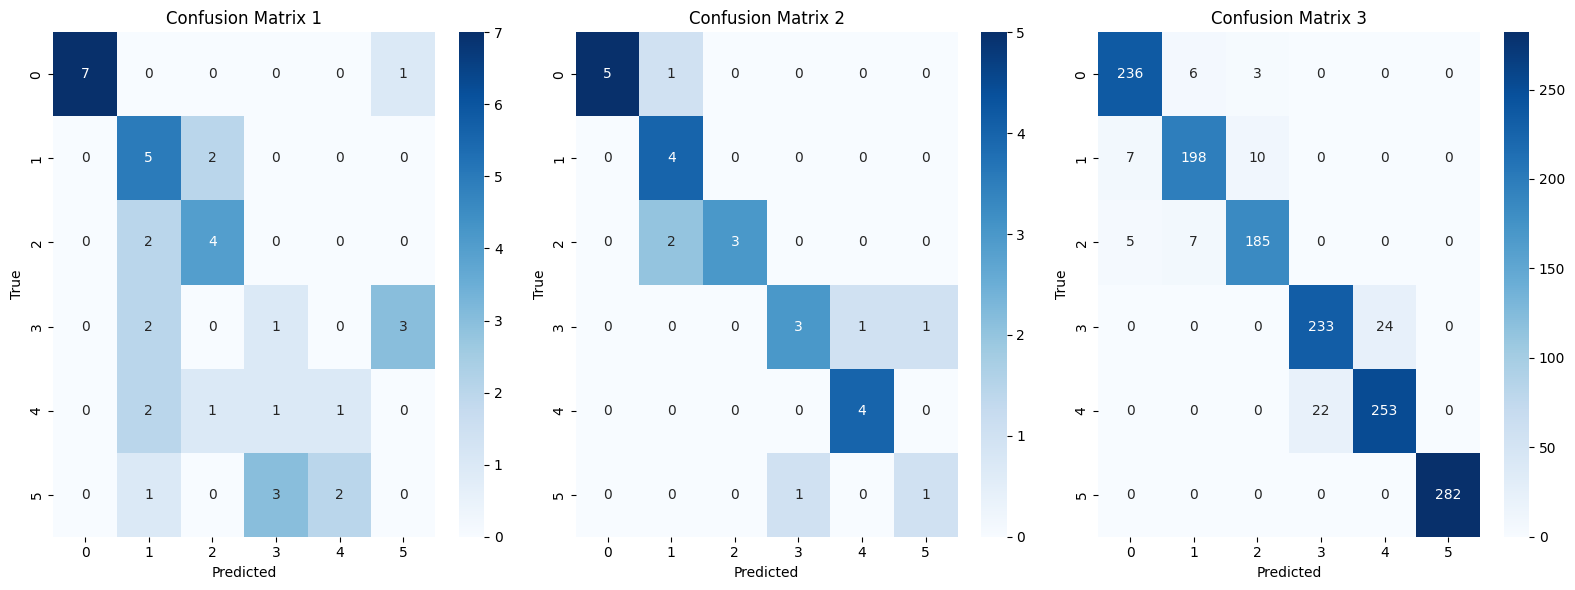

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrices = [conf_matrix_raw, conf_matrix_tsfel, conf_matrix_prov]

accuracy=[accuracy_raw,accuracy_tsfel,accuracy_prov]
precision=[precision_raw,precision_tsfel,precision_prov]
recall=[recall_raw,recall_tsfel,recall_prov]

fig, axes = plt.subplots(1, 3, figsize=(16, 6))
for i, (cm, ax) in enumerate(zip(conf_matrices, axes)):
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix {i+1}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()


**TASK_3**
=

1 

using Provided Features might not work as we don't all the features provided in our datset.so we can proceed with tsfel and raw classifer

**Testing on raw trained model**

In [228]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

samples = []
labels = []

for activity, activity_dir in activity_dirs.items():
    file_names = os.listdir(activity_dir)
    for file_name in file_names:
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)
        
        # take first 500 samples only
        acc_x = data['accx'].values[:500]
        acc_y = data['accy'].values[:500]
        acc_z = data['accz'].values[:500]
        
        # combine into a single vector
        total_acc = np.concatenate((acc_x, acc_y, acc_z))
        samples.append(total_acc)
        labels.append(activity)

samples = np.array(samples)
labels = np.array(labels)

# encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# split train-test
X_train, X_test, y_train, y_test = train_test_split(
    samples, encoded_labels, test_size=0.3, random_state=42
)

# train classifier
raw_clf = DecisionTreeClassifier(random_state=42)
raw_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [230]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

base_path = "/kaggle/input/dataset-collected/ACTIVITIES 2"
activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

test_samples = []
test_labels = []

for activity in activities:
    activity_path = os.path.join(base_path, activity)
    for file_name in os.listdir(activity_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(activity_path, file_name)
            data = pd.read_csv(file_path)
            
            data = data.iloc[200:2200:3, :].reset_index(drop=True)
            data = data.drop(columns=["time"], errors="ignore")
            
            # HAR columns are accx/accy/accz, but collected set has ax(m/s^2) etc.
            acc_x = data["ax (m/s^2)"].values[:500]
            acc_y = data["ay (m/s^2)"].values[:500]
            acc_z = data["az (m/s^2)"].values[:500]
            
            total_acc = np.concatenate((acc_x, acc_y, acc_z))
            
            test_samples.append(total_acc)
            test_labels.append(activity)

X_collected = np.array(test_samples)
y_collected = np.array(test_labels)

# encode labels with same encoder as training
y_collected_enc = label_encoder.transform(y_collected)

# Predict using HAR-trained model
y_pred = raw_clf.predict(X_collected)

# Metrics
accuracy = accuracy_score(y_collected_enc, y_pred)
precision = precision_score(y_collected_enc, y_pred, average="weighted")
recall = recall_score(y_collected_enc, y_pred, average="weighted")
cm = confusion_matrix(y_collected_enc, y_pred)

print("\n Collected Data Results (HAR-trained Raw Model) ")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("Confusion Matrix:\n", cm)



 Collected Data Results (HAR-trained Raw Model) 
Accuracy : 0.1111111111111111
Precision: 0.08333333333333333
Recall   : 0.1111111111111111
Confusion Matrix:
 [[2 0 0 0 1 0]
 [0 0 0 0 3 0]
 [1 0 0 0 2 0]
 [1 1 1 0 0 0]
 [0 2 0 1 0 0]
 [0 0 0 2 1 0]]


In [240]:
cfg = tsfel.get_features_by_domain()

features_list = []
labels = []
for activity, activity_dir in activity_dirs.items():
    for file_name in os.listdir(activity_dir):
        file_path = os.path.join(activity_dir, file_name)
        data = pd.read_csv(file_path)

        feat_df = tsfel.time_series_features_extractor(cfg, data, verbose=0)
        features_list.append(feat_df)
        labels.append(activity)

features_df = pd.DataFrame(pd.concat(features_list, axis=0))
labels_array = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    features_df, labels_array, test_size=0.2, random_state=42
)

tsfel_clf = DecisionTreeClassifier(random_state=42)
tsfel_clf.fit(X_train, y_train)

print("Model trained with features:", X_train.shape[1])
feature_names = X_train.columns   

Model trained with features: 468


In [241]:
base_path = "/kaggle/input/dataset-collected/ACTIVITIES 2"
activities = ["LAYING", "SITTING", "STANDING", "WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

test_features = []
test_labels = []

for activity in activities:
    activity_path = os.path.join(base_path, activity)
    for file_name in os.listdir(activity_path):
        if file_name.endswith(".csv"):
            file_path = os.path.join(activity_path, file_name)
            
            # Load the whole file
            data = pd.read_csv(file_path)

            data = data.iloc[200:700, :].reset_index(drop=True)
            # Drop time column if it exists
            signals = data.drop(columns=["time"], errors="ignore")

            # Extract TSFEL features
            feat_df = tsfel.time_series_features_extractor(cfg, signals, verbose=0)

            # Align with training feature set (important!)
            feat_df = feat_df.reindex(columns=feature_names, fill_value=0)

            test_features.append(feat_df)
            test_labels.append(activity)

# Combine collected test set
X_collected = pd.concat(test_features, axis=0)
y_collected = np.array(test_labels)

# Predict
y_pred = tsfel_clf.predict(X_collected)

accuracy = accuracy_score(y_collected, y_pred)
precision = precision_score(y_collected, y_pred, average="weighted")
recall = recall_score(y_collected, y_pred, average="weighted")
cm = confusion_matrix(y_collected, y_pred)

print("\nCollected data results")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("\nConfusion Matrix:\n", cm)



Collected data results
Accuracy : 0.16666666666666666
Precision: 0.027777777777777776
Recall   : 0.16666666666666666

Confusion Matrix:
 [[3 0 0 0 0 0]
 [3 0 0 0 0 0]
 [3 0 0 0 0 0]
 [3 0 0 0 0 0]
 [3 0 0 0 0 0]
 [3 0 0 0 0 0]]


The Model performed well but needs a lot of improvement as the accuracy,precision and recall are not high. Even though the model is not predicitng the activities with higher accuracy
.

**2**

**raw model training**

In [242]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Activity dataset paths
activity_dirs = {
    'LAYING': "/kaggle/input/dataset-collected/ACTIVITIES 2/LAYING",
    'SITTING': "/kaggle/input/dataset-collected/ACTIVITIES 2/SITTING",
    'STANDING': "/kaggle/input/dataset-collected/ACTIVITIES 2/STANDING",
    'WALKING': "/kaggle/input/dataset-collected/ACTIVITIES 2/WALKING",
    'WALKING_DOWNSTAIRS': "/kaggle/input/dataset-collected/ACTIVITIES 2/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/kaggle/input/dataset-collected/ACTIVITIES 2/WALKING_UPSTAIRS"
}

X_train, X_test, y_train, y_test = [], [], [], []

def preprocess_data(data):
    data = data.iloc[200:700]   
    return data

# Extract raw values
for activity, activity_dir in activity_dirs.items():
    file_names = [f for f in os.listdir(activity_dir) if f.endswith(".csv")]
    train_files, test_files = train_test_split(file_names, test_size=0.33, random_state=42)

    for file_name in train_files:
        data = pd.read_csv(os.path.join(activity_dir, file_name)).drop(columns=["time"], errors="ignore")
        data = preprocess_data(data)
        X_train.append(data.values.flatten())
        y_train.append(activity)

    for file_name in test_files:
        data = pd.read_csv(os.path.join(activity_dir, file_name)).drop(columns=["time"], errors="ignore")
        data = preprocess_data(data)
        X_test.append(data.values.flatten())
        y_test.append(activity)

# Convert to numpy (padding to same length if needed)
max_len = max(max(len(x) for x in X_train), max(len(x) for x in X_test))
X_train = np.array([np.pad(x, (0, max_len-len(x))) for x in X_train])
X_test = np.array([np.pad(x, (0, max_len-len(x))) for x in X_test])
y_train, y_test = np.array(y_train), np.array(y_test)

# Train & Evaluate
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Raw Data Model")
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred, average='weighted'))
print("Recall =", recall_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Raw Data Model
Accuracy = 0.16666666666666666
Precision = 0.05555555555555555
Recall = 0.16666666666666666
Confusion Matrix:
 [[0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 1 0]]


**using tsfel features**

In [243]:
import os
import numpy as np
import pandas as pd
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Activity dataset paths
activity_dirs = {
    'LAYING': "/kaggle/input/dataset-collected/ACTIVITIES 2/LAYING",
    'SITTING': "/kaggle/input/dataset-collected/ACTIVITIES 2/SITTING",
    'STANDING': "/kaggle/input/dataset-collected/ACTIVITIES 2/STANDING",
    'WALKING': "/kaggle/input/dataset-collected/ACTIVITIES 2/WALKING",
    'WALKING_DOWNSTAIRS': "/kaggle/input/dataset-collected/ACTIVITIES 2/WALKING_DOWNSTAIRS",
    'WALKING_UPSTAIRS': "/kaggle/input/dataset-collected/ACTIVITIES 2/WALKING_UPSTAIRS"
}

cfg = tsfel.get_features_by_domain()

X_train, X_test, y_train, y_test = [], [], [], []

def preprocess_data(data):
    data = data.iloc[200:700]  
    return data

# Extract TSFEL features
for activity, activity_dir in activity_dirs.items():
    file_names = [f for f in os.listdir(activity_dir) if f.endswith(".csv")]
    train_files, test_files = train_test_split(file_names, test_size=0.33, random_state=42)

    for file_name in train_files:
        data = pd.read_csv(os.path.join(activity_dir, file_name)).drop(columns=["time"], errors="ignore")
        data = preprocess_data(data)
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
        X_train.append(features.values.flatten())
        y_train.append(activity)

    for file_name in test_files:
        data = pd.read_csv(os.path.join(activity_dir, file_name)).drop(columns=["time"], errors="ignore")
        data = preprocess_data(data)
        features = tsfel.time_series_features_extractor(cfg, data, verbose=0)
        X_test.append(features.values.flatten())
        y_test.append(activity)

X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("TSFEL Features Model ")
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred, average='weighted'))
print("Recall =", recall_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


TSFEL Features Model 
Accuracy = 0.5
Precision = 0.3055555555555555
Recall = 0.5
Confusion Matrix:
 [[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]


The model achieved comperatively low performance (Accuracy ≈ 50%) if compared with the performance on HAR, indicating that extracting TSFEL features on full signals with limited training data was not sufficient. This suggests that the current preprocessing and featurization are not fully effective. With additional data and cross-validation, the model’s accuracy and generalization could be significantly improved.